In [1]:
%pylab inline
from numpy.random import uniform

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [89]:
gamma=0.1 ## minimal distinction
n=10000 ## number of points
C=2
k=round(C/gamma**2) ## number of queries needed to identify polarity 
k

200

In [90]:
poisson=uniform(size=n)
order = argsort(poisson)
points = array(range(n))
points=points[order]
poisson=poisson[order]
poisson[:5],points[:5]

(array([6.89952552e-05, 1.36496377e-04, 5.46430977e-04, 5.64422577e-04,
        6.93772946e-04]),
 array([5908, 2966,  777, 3560, 5416]))

In [91]:
Q=zeros(n)  # 1 if point has been queried
Q[:10]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

## Define conditional distribution

In [92]:
def cond(x):
    if x>1/2: return 0.75
    else: return 0.25

In [93]:
X=list(arange(0,1,0.01))

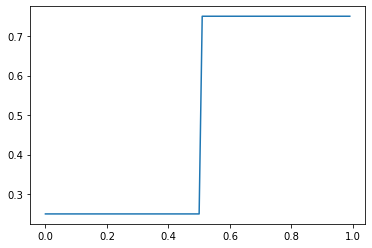

In [94]:
plot(X, [cond(x) for x in X])

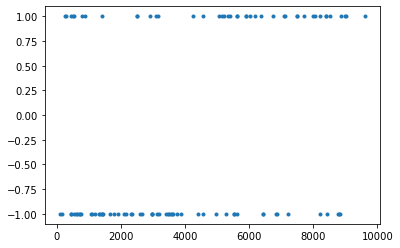

In [113]:
labels=[]
for p in points:
    a=cond(p/n)
    l=uniform(0,1)<a
    if l: l=1
    else: l=-1
    labels.append(l)
labels=array(labels)
plot(points[:100],labels[:100],'.')

## Define balls

In [132]:
from scipy.sparse import coo_array
Balls=[]
for l in arange(0,4):
    List=[]
    s=1/(2**(l+1))
    for x in arange(0,1-s+0.000001,s/2):
        List+=[array([x,x+s])]
    Balls+=[List]
#Balls

## Loop over levels

In [133]:
#label ball and add it to the list of labeled balls.
def LabelBall(b,no_answered,eta):
    #define label to be -1/0/+1
    # create new record in list of labeled balls.

    

In [138]:
Q[:]=0
Q[round(n/4):round(n*3/4):20]=1

##Count number of queries in each segment
for B in Balls:
    #print('shape of B:',shape(B))
    found=False
    for i in range(len(B)):
        b=B[i]
        R=where((points>b[0]*n) & (points<=b[1]*n))[0]  # pointer to answered queries
        s=sum(Q[R])    #number of queries answered
        eta=mean(labels[R]) #mean of answers to queries
        print(f'l={l}, i={i},b={b},\tR.shape={R.shape[0]},number answered={s},eta={eta}')
        
        if (sum(Q[R])>2) and (Q[R].shape[0]<630) and mean(labels[R])>0.1:
            found=True
            print('found')
            break
        
        if s > k:
            A=1
            # if s < C/gamma^2, then don't call
            # else
            #LabelBall(b,s,eta)   #label ball and add it to the list of labeled balls.
            #del B[i]
    if found:
        print('found')
        break

sum(Q[R]), Q[R].shape[0]

l=3, i=0,b=[0.  0.5],	R.shape=5000,number answered=118.0,eta=-0.508
l=3, i=1,b=[0.25 0.75],	R.shape=5000,number answered=132.0,eta=-0.0068
l=3, i=2,b=[0.5 1. ],	R.shape=4999,number answered=132.0,eta=0.5007001400280056
l=3, i=0,b=[0.   0.25],	R.shape=2500,number answered=54.0,eta=-0.512
l=3, i=1,b=[0.125 0.375],	R.shape=2500,number answered=61.0,eta=-0.508
l=3, i=2,b=[0.25 0.5 ],	R.shape=2500,number answered=64.0,eta=-0.504
l=3, i=3,b=[0.375 0.625],	R.shape=2500,number answered=68.0,eta=-0.0088
l=3, i=4,b=[0.5  0.75],	R.shape=2500,number answered=68.0,eta=0.4904
l=3, i=5,b=[0.625 0.875],	R.shape=2500,number answered=74.0,eta=0.5088
l=3, i=6,b=[0.75 1.  ],	R.shape=2499,number answered=64.0,eta=0.5110044017607043
l=3, i=0,b=[0.    0.125],	R.shape=1250,number answered=22.0,eta=-0.504
l=3, i=1,b=[0.0625 0.1875],	R.shape=1250,number answered=26.0,eta=-0.4976
l=3, i=2,b=[0.125 0.25 ],	R.shape=1250,number answered=32.0,eta=-0.52
l=3, i=3,b=[0.1875 0.3125],	R.shape=1250,number answered=33.0,et

(18.0, 625)

In [139]:
R

array([   4,    6,   20,   46,   47,   58,   71,   75,   78,   83,  132,
        146,  162,  170,  186,  189,  198,  203,  222,  240,  248,  257,
        261,  265,  332,  335,  338,  366,  380,  404,  406,  417,  429,
        463,  467,  515,  516,  539,  594,  623,  643,  656,  667,  683,
        686,  690,  721,  739,  743,  761,  779,  805,  821,  824,  832,
        840,  845,  855,  860,  873,  961,  969,  972,  973,  990, 1006,
       1015, 1047, 1053, 1070, 1072, 1086, 1092, 1110, 1113, 1115, 1124,
       1173, 1205, 1251, 1275, 1285, 1300, 1348, 1388, 1409, 1411, 1417,
       1429, 1513, 1559, 1562, 1577, 1590, 1598, 1616, 1651, 1658, 1682,
       1694, 1695, 1699, 1715, 1720, 1729, 1766, 1772, 1796, 1815, 1824,
       1840, 1866, 1890, 1895, 1935, 1936, 1978, 2016, 2023, 2032, 2033,
       2043, 2048, 2074, 2083, 2085, 2090, 2095, 2097, 2135, 2140, 2142,
       2150, 2151, 2160, 2178, 2180, 2184, 2220, 2227, 2228, 2240, 2253,
       2258, 2281, 2311, 2317, 2343, 2345, 2357, 23

In [140]:
eta=mean(labels[R])

In [119]:
a=array(range(100))

In [120]:
where(a>90)

(array([91, 92, 93, 94, 95, 96, 97, 98, 99]),)